In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/hourly-energy-consumption/est_hourly.paruqet
/kaggle/input/hourly-energy-consumption/DOM_hourly.csv
/kaggle/input/hourly-energy-consumption/EKPC_hourly.csv
/kaggle/input/hourly-energy-consumption/DUQ_hourly.csv
/kaggle/input/hourly-energy-consumption/DAYTON_hourly.csv
/kaggle/input/hourly-energy-consumption/PJME_hourly.csv
/kaggle/input/hourly-energy-consumption/PJM_Load_hourly.csv
/kaggle/input/hourly-energy-consumption/NI_hourly.csv
/kaggle/input/hourly-energy-consumption/FE_hourly.csv
/kaggle/input/hourly-energy-consumption/COMED_hourly.csv
/kaggle/input/hourly-energy-consumption/AEP_hourly.csv
/kaggle/input/hourly-energy-consumption/pjm_hourly_est.csv
/kaggle/input/hourly-energy-consumption/DEOK_hourly.csv
/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error
color_pal = sns.color_palette()
import xgboost as xgb


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
import os
for dirname, _, filenames in os.walk('/kaggle/input/hourly-energy-consumption'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/hourly-energy-consumption/est_hourly.paruqet
/kaggle/input/hourly-energy-consumption/DOM_hourly.csv
/kaggle/input/hourly-energy-consumption/EKPC_hourly.csv
/kaggle/input/hourly-energy-consumption/DUQ_hourly.csv
/kaggle/input/hourly-energy-consumption/DAYTON_hourly.csv
/kaggle/input/hourly-energy-consumption/PJME_hourly.csv
/kaggle/input/hourly-energy-consumption/PJM_Load_hourly.csv
/kaggle/input/hourly-energy-consumption/NI_hourly.csv
/kaggle/input/hourly-energy-consumption/FE_hourly.csv
/kaggle/input/hourly-energy-consumption/COMED_hourly.csv
/kaggle/input/hourly-energy-consumption/AEP_hourly.csv
/kaggle/input/hourly-energy-consumption/pjm_hourly_est.csv
/kaggle/input/hourly-energy-consumption/DEOK_hourly.csv
/kaggle/input/hourly-energy-consumption/PJMW_hourly.csv


In [4]:
data = pd.read_csv('/kaggle/input/hourly-energy-consumption/PJME_hourly.csv')
data= data.set_index('Datetime')
data.index = pd.to_datetime(data.index)

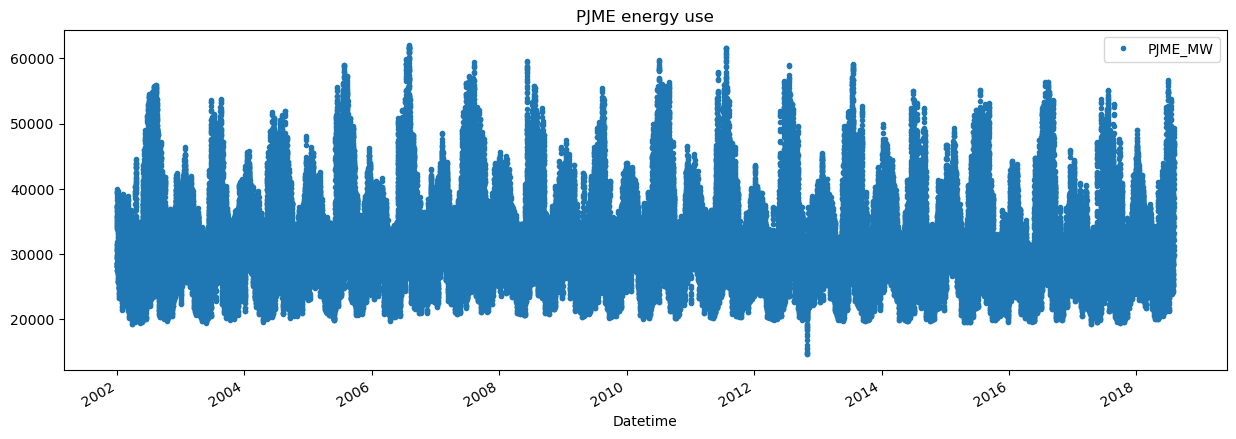

In [5]:
data.plot(style='.', figsize=(15,5), color=color_pal[0], 
          title = 'PJME energy use')

plt.show()


# Train and test the data

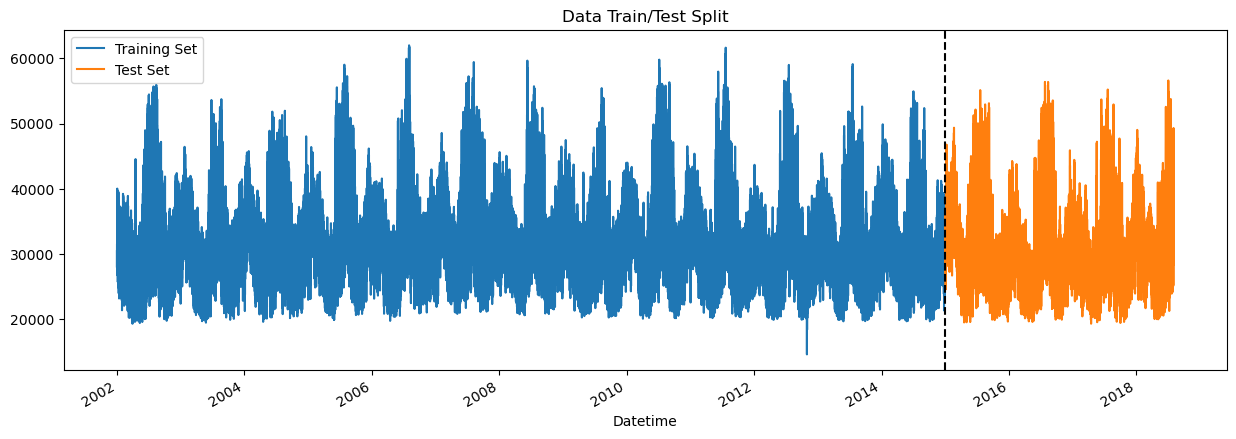

In [6]:
train = data.loc[data.index < '01-01-2015']
test = data.loc[data.index >= '01-01-2015']

fig, ax = plt.subplots(figsize=(15, 5))
train.plot(ax=ax, label='Training Set', 
           title='Data Train/Test Split')

test.plot(ax=ax, label='Test Set')
ax.axvline('01-01-2015', color='black', ls='--')
ax.legend(['Training Set', 'Test Set'])
plt.show()

In [7]:
def create_features(data):
    
    data=data.copy()
    data['hour']=data.index.hour
    data['day']=data.index.dayofweek
    data['quarter']=data.index.quarter
    data['month']=data.index.month
    data['years']=data.index.year
    data['dayofyear']=data.index.dayofyear
    
    return data;

data=create_features(data)


# Visualization

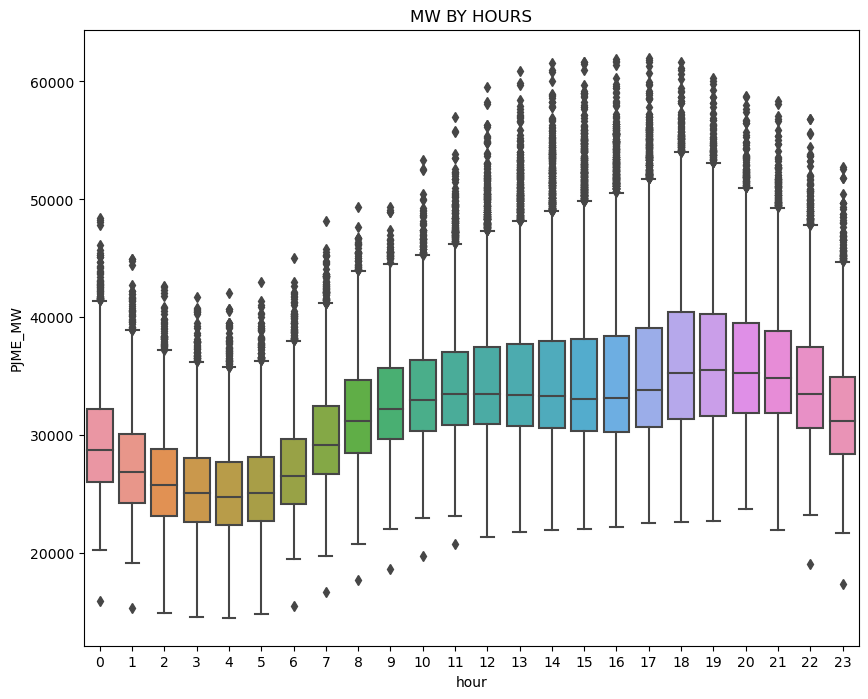

In [8]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=data, x='hour', y='PJME_MW')
ax.set_title('MW BY HOURS')
plt.show()

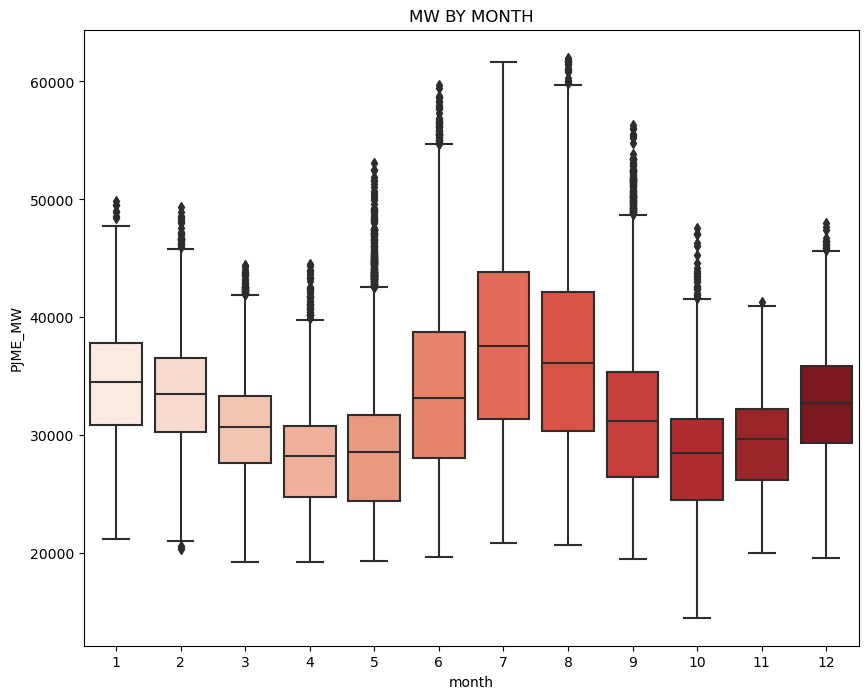

In [9]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=data, x='month', y='PJME_MW', palette='Reds')
ax.set_title('MW BY MONTH')
plt.show()

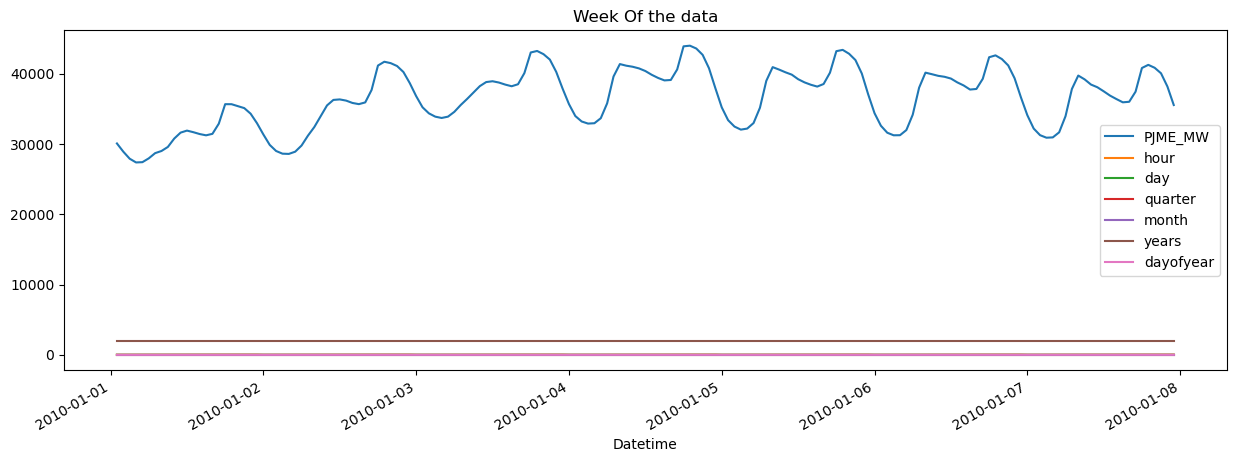

In [10]:
data.loc[(data.index>'01-01-2010')&(data.index<'01-08-2010')] .plot(figsize=(15,5),title='Week Of the data')
plt.show()

# Create model


In [11]:
train=create_features(train)
test=create_features(test)

In [12]:
data.columns

Index(['PJME_MW', 'hour', 'day', 'quarter', 'month', 'years', 'dayofyear'], dtype='object')

In [13]:
FEATURES =['hour', 'day', 'quarter', 'month', 'years', 'dayofyear']
TARGET=['PJME_MW']          

In [14]:
X_train=train[FEATURES]
Y_train=train[TARGET]

X_test=test[FEATURES]
Y_test=test[TARGET]

In [15]:
#regression test
reg=xgb.XGBRegressor(n_estimators=1000, early_stopping_rounds=50,
                    learning_rate=0.01)
reg.fit(X_train,Y_train,
       eval_set=[(X_train, Y_train), (X_test, Y_test)],
       verbose=100)

[0]	validation_0-rmse:32601.87826	validation_1-rmse:31654.28935
[100]	validation_0-rmse:12342.17856	validation_1-rmse:11516.21767
[200]	validation_0-rmse:5373.20460	validation_1-rmse:5164.97392
[300]	validation_0-rmse:3375.48321	validation_1-rmse:3834.00707
[400]	validation_0-rmse:2884.85132	validation_1-rmse:3716.33146
[450]	validation_0-rmse:2771.93085	validation_1-rmse:3730.77469


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=50,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=1000, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

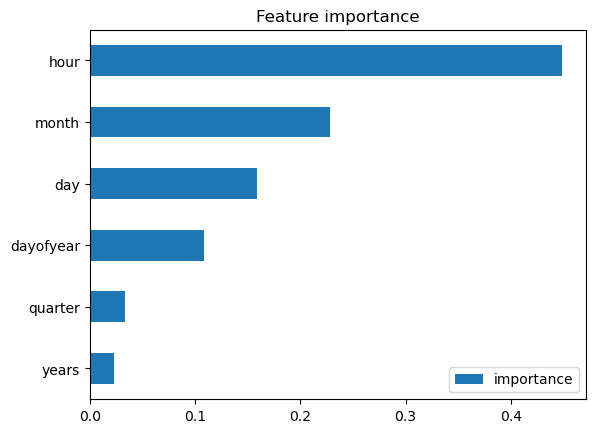

In [16]:
f= pd.DataFrame(data=reg.feature_importances_,
                index=reg.feature_names_in_,
                columns=['importance'])
f.sort_values('importance').plot(kind='barh', title='Feature importance')
plt.show()

# Forecast on the test data

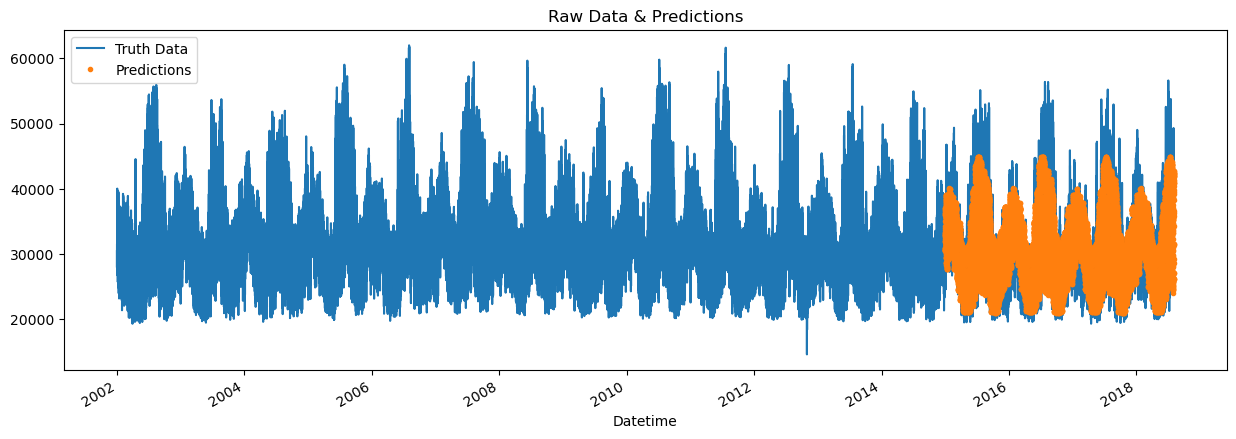

In [17]:
test['predictions']=reg.predict(X_test)
data= data.merge(test[['predictions']],how='left', left_index=True,right_index=True)
ax= data[['PJME_MW']].plot(figsize=(15,5))
data['predictions'].plot(ax=ax, style='.')
plt.legend(['Truth Data', 'Predictions'])
ax.set_title('Raw Data & Predictions')
plt.show()

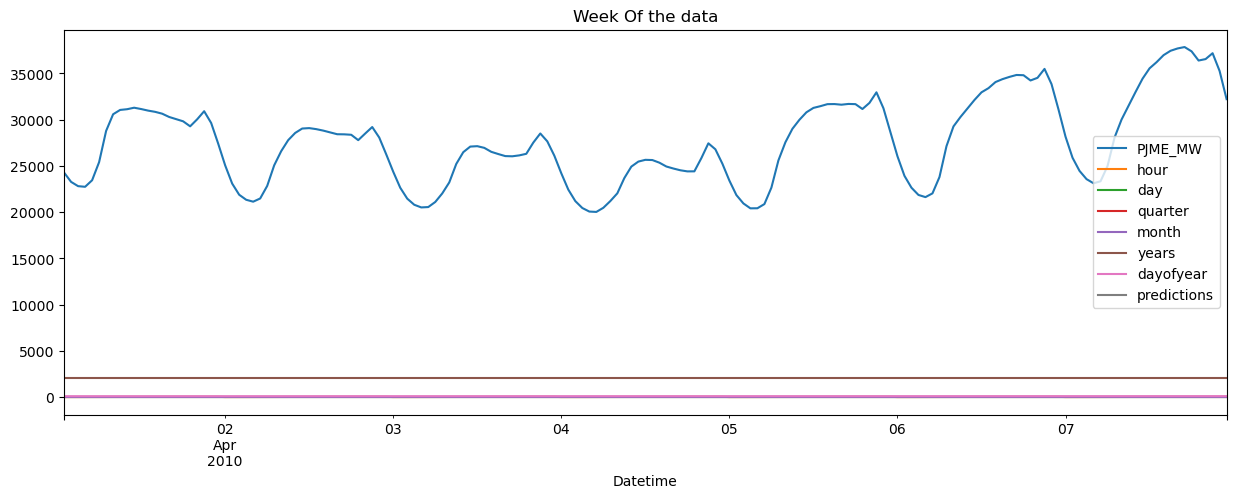

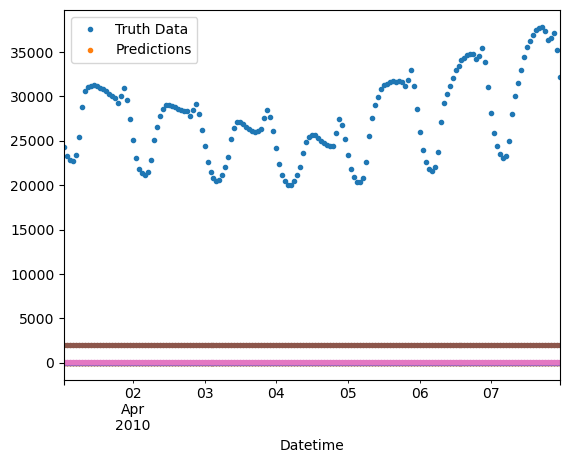

In [18]:
ax= data.loc[(data.index>'04-01-2010')&(data.index<'04-08-2010')].plot(figsize=(15,5),title='Week Of the data')

data.loc[(data.index>'04-01-2010')&(data.index<'04-08-2010')].plot(style='.')

plt.legend(['Truth Data', 'Predictions'])
plt.show()

In [19]:
score = np.sqrt(mean_squared_error(test['PJME_MW'],test['predictions']))
print(f'RMSE Score on test set: {score:0.2f}')

RMSE Score on test set: 3715.93


In [20]:
#test['date']=test.index.date
#test.groupby('date')(np.abs(test[TARGET] - test['predictions'])).mean()

# Outliner Analysis and removal

<Axes: ylabel='Frequency'>

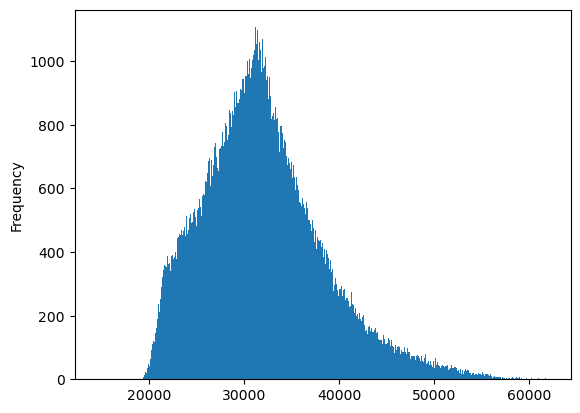

In [21]:
data['PJME_MW'].plot(kind='hist', bins=500)

<Axes: title={'center': 'Outliers'}, xlabel='Datetime'>

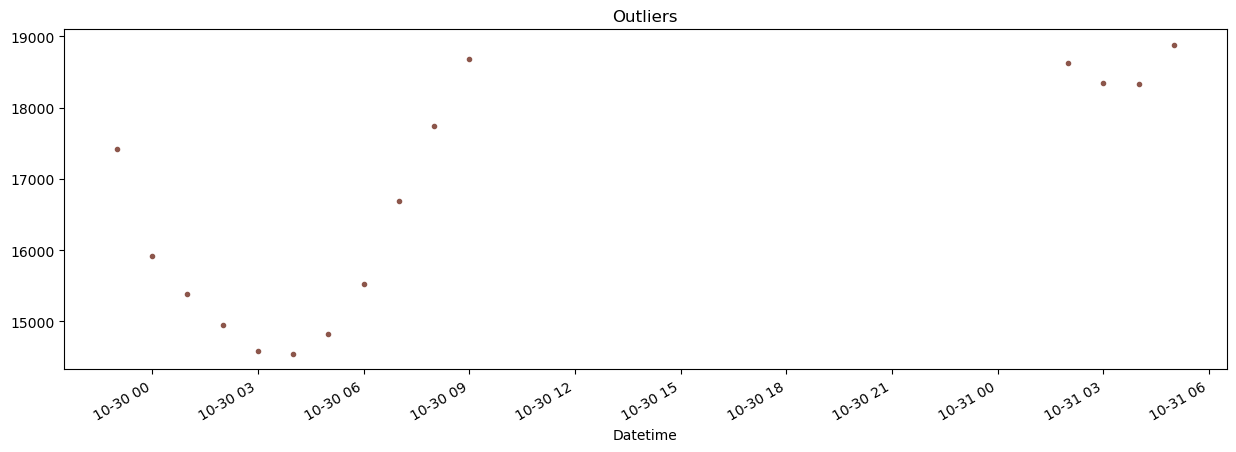

In [22]:
data.query('PJME_MW < 19_000')['PJME_MW'] \
    .plot(style='.',
          figsize=(15, 5),
          color=color_pal[5],
          title='Outliers')

In [23]:
data = data.query('PJME_MW > 19_000').copy()

# Conclusion
We get the best and the worst time series 